# HR Analytics of Attrition using Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
general=pd.read_csv(r'C:\Users\Lenovo\Desktop\Arun DS\Task 10 & 11\Task-10\general_data.csv')
emp=pd.read_csv(r'C:\Users\Lenovo\Desktop\Arun DS\Task 10 & 11\Task-10\employee_survey_data.csv')
man=pd.read_csv(r'C:\Users\Lenovo\Desktop\Arun DS\Task 10 & 11\Task-10\manager_survey_data.csv')


In [5]:
print(general.shape)
print(emp.shape)
print(man.shape)

(4410, 24)
(4410, 4)
(4410, 3)


So we have 3 datasets so lets merger employee and manager into the general data

In [9]:
general=general.join(emp,on='EmployeeID',rsuffix='emp')
general=general.join(man,on='EmployeeID',rsuffix='man')

In [10]:
general.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EmployeeIDemp,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,EmployeeIDman,JobInvolvement,PerformanceRating
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1,0,0,2.0,3.0,2.0,4.0,2.0,2.0,4.0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,5,1,4,3.0,2.0,2.0,1.0,3.0,3.0,3.0
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,5,0,3,4.0,4.0,4.0,3.0,4.0,2.0,3.0
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,8,7,5,5.0,4.0,1.0,3.0,5.0,3.0,3.0
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,6,0,4,6.0,3.0,2.0,2.0,6.0,3.0,3.0


In [12]:
general.shape

(4410, 31)

We have now successfully converted 3 datasets  into one column, Lets Start EDA part now

# EDA

In [13]:
print('Null values in dataset')
print(general.isnull().sum())

Null values in dataset
Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
EmployeeIDemp               1
EnvironmentSatisfaction    26
JobSatisfaction            21
WorkLifeBalance            39
EmployeeIDman               1
JobInvolvement              1
PerformanceRating           1
dtype: int64


So as per above table we have null values in 8 columns, Lets see what best we can do here by analysing the features

After checking all the features, Lets replace the values with mean method

In [15]:
#replace missing values with mean
general.fillna(general.mean(),inplace=True)

In [16]:
general.isnull().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
EmployeeIDemp              0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
EmployeeIDman              0
JobInvolvement             0
PerformanceRating          0
dtype: int64

We have successfully worked on all the NaN values by mean computation

In [18]:
#there are columns like EmployeeCount,Over18,Standard hours that has only 1 value, Hence we will drop them
general.drop(['EmployeeCount','Over18','StandardHours'],inplace=True,axis=1)

In [20]:
#lets get overall number and percent of people left and stayed
no=general.Attrition.value_counts()['No']
yes=general.Attrition.value_counts()['Yes']

In [32]:
print('Attrition-No: Count=',no,'& Percentage=',((no/len(general))*100).round(2))
print('Attrition-Yes: Count=',yes,'& Percentage=',((yes/len(general))*100).round(2))

Attrition-No: Count= 3699 & Percentage= 83.88
Attrition-Yes: Count= 711 & Percentage= 16.12


In [33]:
#Lets add Attrition Column to eos_df and find out relationship between Employee Survey Results and Attrition
emp=emp.join(general['Attrition'],on='EmployeeID',rsuffix='gen')
man=man.join(general['Attrition'],on='EmployeeID',rsuffix='gen')

In [35]:
# create new dataframe of Attrition from EmployeeSurvey
emp_yes=emp.loc[emp['Attrition']=='Yes']

# create new dataframe of Attrition from EmployeeSurvey
man_yes=man.loc[emp['Attrition']=='Yes']

In [45]:
# Create summary dataframe for ratings
yes_summary=pd.DataFrame({'Ratings':[0,1,2,3,4]})

#Create new columns from EmployeeSurvey and store count in summary dataframe
yes_summary['EnvironmentSatisfaction']=emp.groupby(['EnvironmentSatisfaction'])['Attrition'].count()
yes_summary['JobSatisfaction']=emp.groupby(['JobSatisfaction'])['Attrition'].count()
yes_summary['WorkLifeBalance']=emp.groupby(['WorkLifeBalance'])['Attrition'].count()
yes_summary['JobInvolvement']=man.groupby(['JobInvolvement'])['Attrition'].count()
yes_summary['PerformanceRating']=man.groupby(['PerformanceRating'])['Attrition'].count()

In [48]:
# remove row with NA value
yes_summary.fillna(0,inplace=True)

In [52]:
# Replace Rating number to Text
yes_summary.Ratings.replace({1:'Low',2:'Medium',3:'High',4:'Very High',},inplace=True)

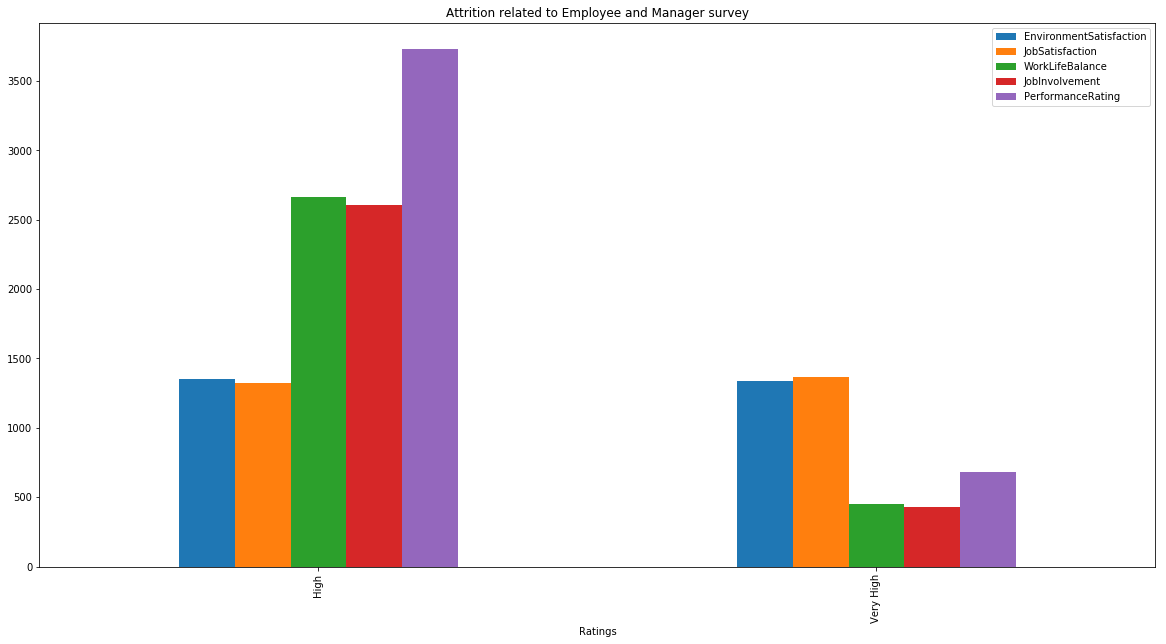

In [53]:
yes_summary.plot(kind='bar',x='Ratings',figsize=(20,10),title='Attrition related to Employee and Manager survey')

# Observation

Above data suggests that People with High and Very High Employee Satisfaction and Performance Ratings have left an Organisation.

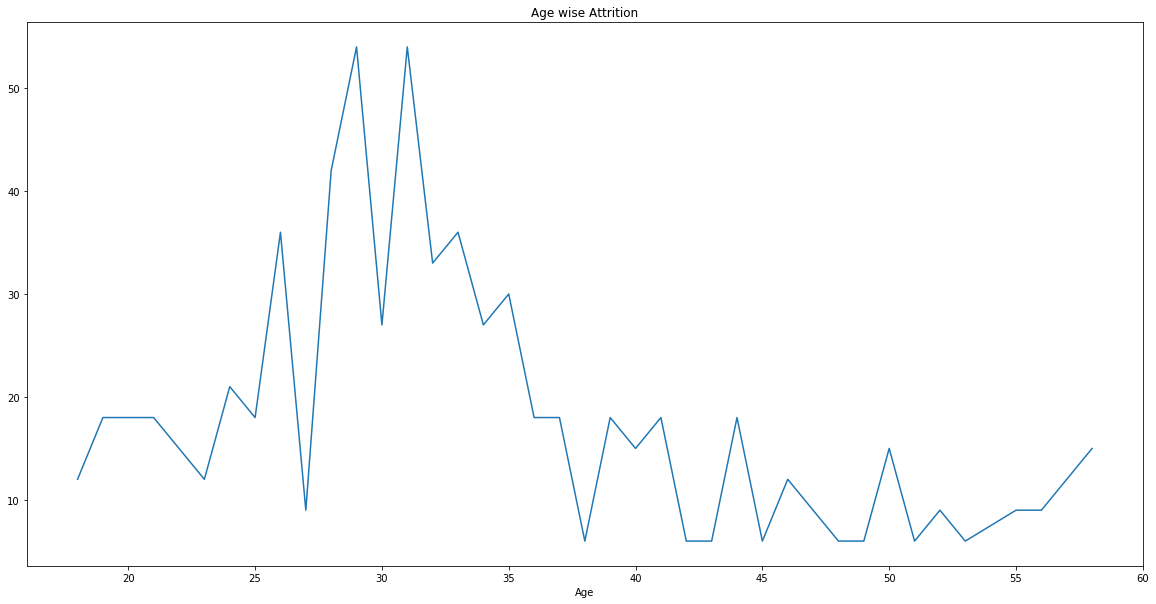

In [68]:
# Lets look Age of people who have left Organisation
attrition_age=general.loc[general['Attrition']=='Yes'].groupby('Age')['Attrition'].count()\
.plot(kind='line',figsize=(20,10),title='Age wise Attrition')

High number of People between age of 25 and 35 have left an Organisation with max being at age of 29 and 31

C:\Users\Lenovo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


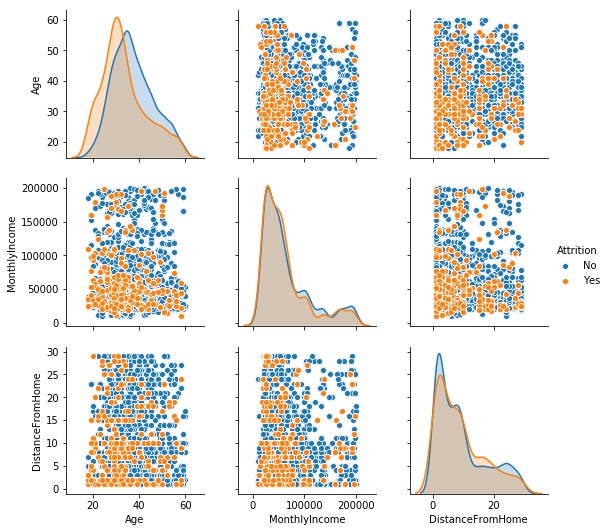

In [69]:
sns.pairplot(general[['Age','MonthlyIncome','DistanceFromHome','Attrition']],hue='Attrition')

In [73]:
x=general.drop(['Attrition','EmployeeID'],axis=1)
#x=gen_df.drop(['Attrition','EmployeeID','BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus'],axis=1)
y=general['Attrition']
y.replace({'Yes':1,'No':0},inplace=True)

In [76]:
# There are few fiels whose data type is Object indicating they have categorical values.
# Attrition, BusinessTravel, Department, EducationField, Gender, JobRole, MaritalStatus

from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
x["BusinessTravel"]=labelencoder.fit_transform(x['BusinessTravel'].fillna(0))
x["Department"]=labelencoder.fit_transform(x['Department'].fillna(0))
x["EducationField"]=labelencoder.fit_transform(x['EducationField'].fillna(0))
x["Gender"]=labelencoder.fit_transform(x['Gender'].fillna(0))
x["JobRole"]=labelencoder.fit_transform(x['JobRole'].fillna(0))
x["MaritalStatus"]=labelencoder.fit_transform(x['MaritalStatus'].fillna(0))

Model-1  Without scaling

In [82]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [83]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)

y_pred=lr.predict(X_test)

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [84]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_pred,y_test)
cm

array([[1100,  223],
       [   0,    0]], dtype=int64)

In [85]:
from sklearn.metrics import accuracy_score
ac=accuracy_score(y_test,y_pred)
ac

0.8314436885865457

Model-2 Scale


In [91]:
from sklearn import preprocessing
X_train_scaled=preprocessing.scale(X_train)
X_test_scaled=preprocessing.scale(X_test)

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by the scale function.
  
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by the scale function.
  This is separate from the ipykernel package so we can avoid doing imports until


In [96]:
lr.fit(X_train_scaled,y_train)

y_pred=lr.predict(X_test_scaled)

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [97]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[1097,    3],
       [ 211,   12]], dtype=int64)

In [98]:
ac=accuracy_score(y_test,y_pred)
ac

0.8382464096749811